<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/4_Salary_Analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

#### Original Exploration

[18_Matplotlib_Box_Plots.ipynb](../2_Advanced/18_Matplotlib_Box_Plots.ipynb)  
[19_Exercise_Skill_Pay_Analysis.ipynb](../2_Advanced/19_Exercise_Skill_Pay_Analysis.ipynb)

## Import Libraries and Data

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
df_european_cleaned = pd.read_csv("df_european_cleaned_copy.csv")

df_european_cleaned_copy = df_european_cleaned.copy()
# Data Cleanup
df_european_cleaned_copy['job_posted_date'] = pd.to_datetime(df_european_cleaned_copy['job_posted_date'])
df_european_cleaned_copy['job_skills'] = df_european_cleaned_copy['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution by Job Title

Filter our data to only include salary values from the Europe.

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [3]:
job_titles = df_european_cleaned_copy['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_EU_top6 = df_european_cleaned_copy[df_european_cleaned_copy['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_EU_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Software Engineer',
 'Business Analyst',
 'Senior Data Engineer']

## Plot Salary Distributions

Plot the top 6 job titles salary distributions using a barplot.

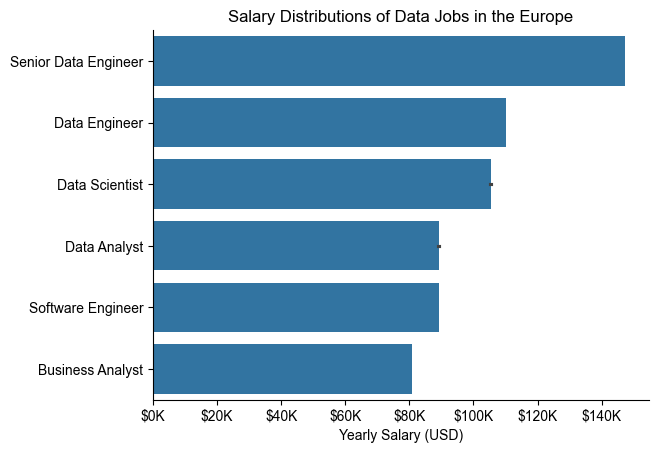

In [4]:
sns.barplot(data=df_EU_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the Europe')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the Europe Region', to create a new DataFrame `df_DA_EU`. Drop NaN values from the 'salary_year_avg' column. Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the `salary_year_avg` and `job_skills` columns.

In [5]:
# Only get data analyst jobs in the US
df_EU_DA =  df_european_cleaned_copy[df_european_cleaned_copy['job_title_short'] == "Data Analyst"].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_EU_DA = df_EU_DA.dropna(subset=['salary_year_avg'])

In [6]:
df_EU_DA = df_EU_DA.explode('job_skills')

df_EU_DA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
4,89100.0,sql
4,89100.0,php
4,89100.0,excel
4,89100.0,power bi
4,89100.0,sap


## Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for Data Analysts by calculating the mean salary for each skill listed in the `df_EU_DA`. It groups the data by job skills, computes the median salary, sorts these values in descending order by mean, and then selects the top 10. This is then formatted into a new DataFrame (`df_EU_top_pay`) with a reset index and a renamed salary column labeled 'mean_salary'.

In [7]:
df_EU_top_pay = df_EU_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

df_EU_top_pay = df_EU_top_pay.head(10)

df_EU_top_pay

,count,mean
job_skills,,
svn,28,100203.571429
aurora,30,91630.000000
npm,10,91310.200000
unify,58,90387.620690
smartsheet,54,90320.370370
kafka,442,90245.453620
terraform,159,90187.430818
flask,68,90186.463235
asana,54,90181.481481


Calculates the count and median salary for each skill in `df_EU_DA`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [8]:
df_EU_skills = df_EU_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

df_EU_skills = df_EU_skills.head(10).sort_values(by='mean', ascending=False)

df_EU_skills

,count,mean
job_skills,,
azure,4902,89343.320481
python,21643,89141.149679
sql,32360,89120.058838
r,9808,89111.051489
sap,5156,89104.224302
power bi,16432,89089.005021
tableau,13979,89088.603548
sas,8118,89085.916482
excel,20564,89036.005082


Creates two horizontal bar charts: 
1. Displays the highest paid skills 
2. Shows the most in demand skills 

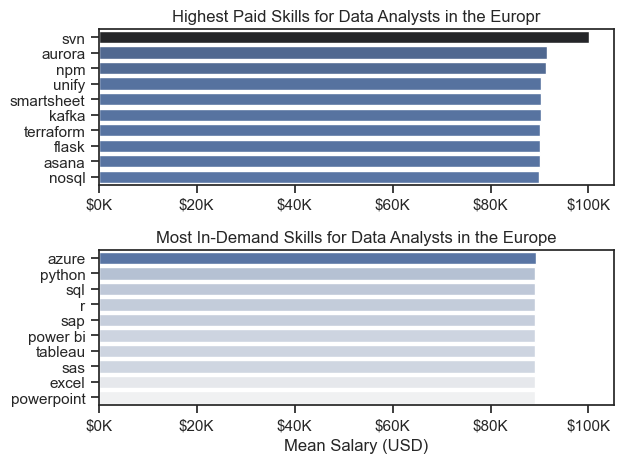

In [10]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_EU_top_pay, x='mean', y=df_EU_top_pay.index, hue='mean', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the Europr')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_EU_skills, x='mean', y=df_EU_skills.index, hue='mean', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the Europe')
ax[1].set_ylabel('')
ax[1].set_xlabel('Mean Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()